In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


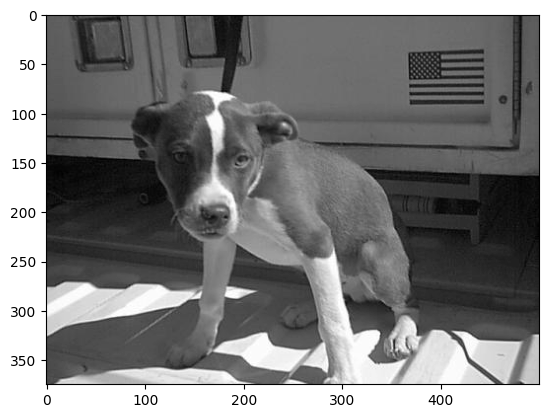

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = '/content/gdrive/My Drive/Datasets/PetImages/'

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

In [26]:
print(img_array.shape)

(375, 500)


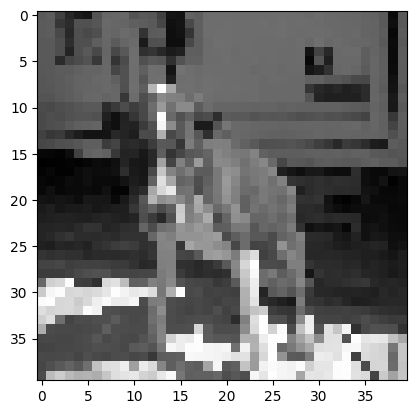

In [32]:
IMG_SIZE = 40
#redimensionne img_array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [33]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
      path = os.path.join(DATADIR,category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass

create_training_data()

In [42]:
#nb d'elem = nb d'images total
print(len(training_data))

822


In [35]:
import random
#Mélange les données pour s'assurer que les données d'entraînement ne sont pas dans un ordre spécifique,
#Aide à éviter que le modèle ne s'entraîne sur des données biaisées.
random.shuffle(training_data)

In [37]:
for sample in training_data[:10]:
  print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [38]:
X = []
y = []

#boucle décomposant chaque elem en image redimensionnée et en classe correspondante
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [39]:
#permet de sérialiser (convertir en bytes) pour sauv dans des fichiers
import pickle

#ouvre fichier en mode écriture binaire et sérialise l'objet 'X'
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [40]:
#ouvre fichier en mode lecture binaire et désérialise son contenu
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [41]:
#affiche 2nd elem du tableau 'X'
X[1]

array([[[ 63],
        [ 59],
        [ 54],
        ...,
        [ 68],
        [ 40],
        [ 66]],

       [[ 65],
        [ 57],
        [ 57],
        ...,
        [ 54],
        [ 57],
        [ 47]],

       [[ 64],
        [ 58],
        [ 61],
        ...,
        [ 63],
        [ 43],
        [ 47]],

       ...,

       [[107],
        [118],
        [106],
        ...,
        [ 91],
        [105],
        [140]],

       [[ 98],
        [117],
        [120],
        ...,
        [117],
        [112],
        [105]],

       [[ 93],
        [ 90],
        [102],
        ...,
        [122],
        [108],
        [119]]], dtype=uint8)